# 🌍 Módulo 3.1: Introducción al Aprendizaje No Supervisado
### Ejemplos prácticos

Este cuaderno contiene ejemplos prácticos de las principales tareas del aprendizaje no supervisado: clustering, reducción de dimensionalidad y detección de anomalías.

## 1️⃣ Clustering: Encontrando Grupos Naturales

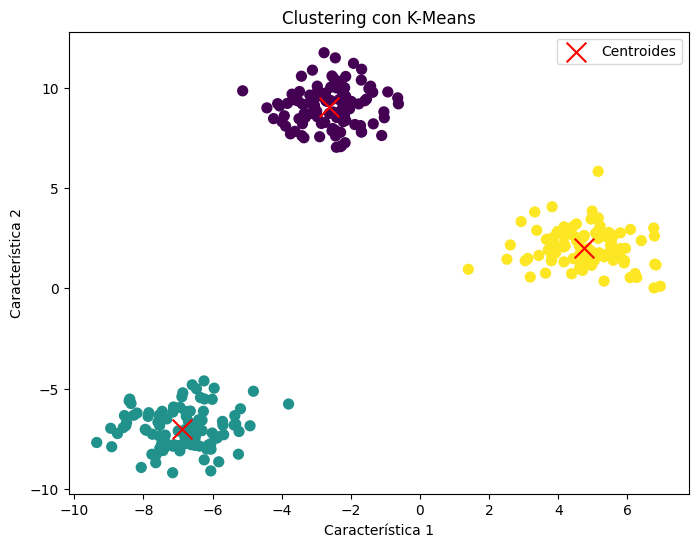

In [1]:
from sklearn.datasets import make_blobs # Generar datos sintéticos
from sklearn.cluster import KMeans # Algoritmo K-Means
import matplotlib.pyplot as plt # Visualización

# Generar datos sintéticos con 3 grupos
# Cada grupo tiene 100 muestras y 2 características
# Usando make_blobs
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

# Aplicar K-Means
# Inicializar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizar los clusters
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.title('Clustering con K-Means')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

## 2️⃣ Reducción de Dimensionalidad: Visualizando Datos Complejos

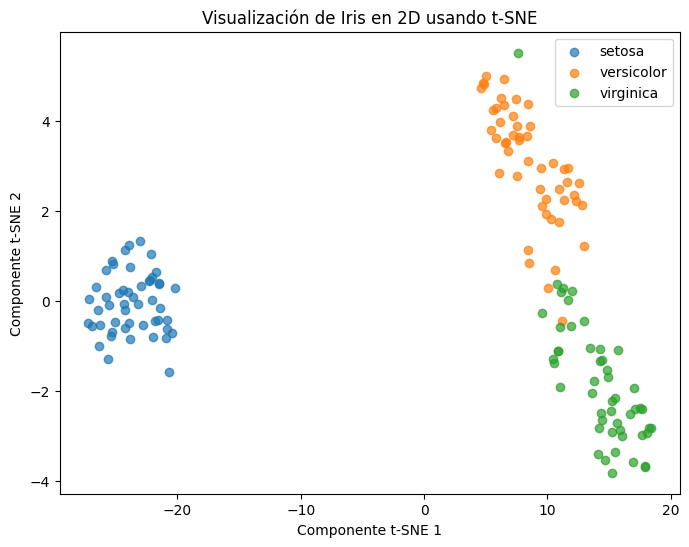

In [ ]:
# Reducción de Dimensionalidad: Visualizando Datos Complejos 
# con t-SNE

from sklearn.datasets import load_iris # Cargar el dataset Iris
from sklearn.manifold import TSNE # t-SNE
import matplotlib.pyplot as plt # Visualización

# Cargar el dataset Iris
iris = load_iris() # Cargar datos de Iris
X_iris = iris.data
y_iris = iris.target
target_names = iris.target_names

# Usaremos t-SNE y no PCA para este conjunto de datos
# porque t-SNE maneja mejor las relaciones no lineales
# entre las características, lo que es útil para conjuntos de datos
# como Iris donde las clases pueden no estar separadas linealmente.
# Aplicar t-SNE para reducir a 2 dimensiones
# Inicializar t-SNE con 2 componentes
# Perplexity ajustada para conjuntos de datos pequeños
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_iris)

# Visualizar el resultado
plt.figure(figsize=(8,6))
for i, name in enumerate(target_names):
    plt.scatter(X_tsne[y_iris == i, 0], X_tsne[y_iris == i, 1], label=name, alpha=0.7)
plt.title('Visualización de Iris en 2D usando t-SNE')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.legend()
plt.show()

## 3️⃣ Detección de Anomalías: Buscando lo Extraño

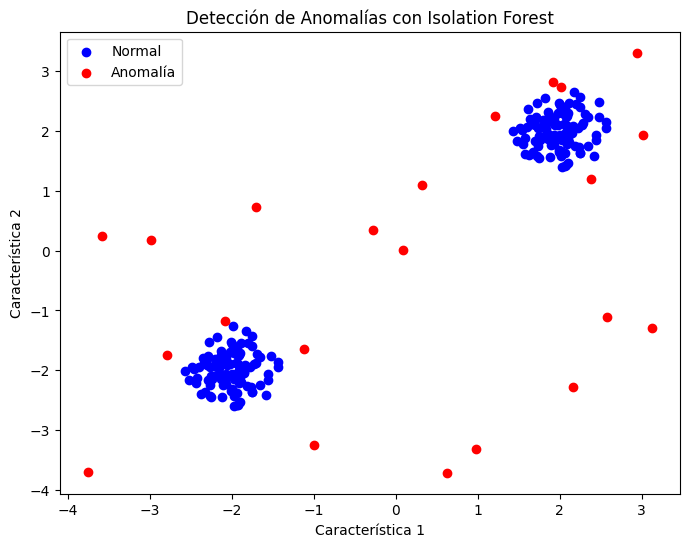

In [3]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Generar datos normales y algunos outliers
rng = np.random.RandomState(42)
X_inliers = 0.3 * rng.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X_anomaly = np.r_[X_inliers, X_outliers]

# Aplicar Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
y_pred = clf.fit_predict(X_anomaly)

# Visualizar
plt.figure(figsize=(8,6))
plt.scatter(X_anomaly[y_pred==1, 0], X_anomaly[y_pred==1, 1], c='blue', label='Normal')
plt.scatter(X_anomaly[y_pred==-1, 0], X_anomaly[y_pred==-1, 1], c='red', label='Anomalía')
plt.title('Detección de Anomalías con Isolation Forest')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

---
Estos ejemplos ilustran las tareas principales del aprendizaje no supervisado: descubrir grupos, simplificar datos complejos y detectar observaciones inusuales.